In [1]:
import sys
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from explain.xai_calc import create_eval_dataframe, compare_experiments, prepare_r, compare_r_testset
from explain.xai_dataloader import XAIDataLoader
from explain.xai_plot import plot_two_models_r_vs_k, plot_true_fake_maps
from correlation_coefficient import compute_r

/usr/local/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
output_dir = "../output"
orig_gan = "original_GAN_xai_experiments"
aug_gan = "robust_10percent_pix2pix_2_bs32_ep1_lambda1000_vanilla"
xai_res_dir = 'xai_results'
exp_names = ['test', 'xai_exp_ha', 'xai_exp_oiii','xai_exp_faint_ha',
             'xai_exp_random','xai_exp_random_ha','xai_exp_random_oiii',
             'xai_exp_occlusion']
ori_output_dir = os.path.join(output_dir, orig_gan)
aug_output_dir = os.path.join(output_dir, aug_gan)
ori_results_dir = os.path.join(ori_output_dir, xai_res_dir)
aug_results_dir = os.path.join(aug_output_dir, xai_res_dir)
names = ['test', 'xai_exp_ha', 'xai_exp_oiii', 'xai_exp_faint_ha' ]
nrun = 100
nindex = 1
suffix_list = [ "run{:d}_index{:d}".format(i, j) for i in range(nrun) for j in range(nindex) ]

In [3]:
orig_test, _ = create_eval_dataframe(ori_output_dir, exp_names[0], suffix_list, nbins=20, log_bins=True)

In [4]:
aug_test, k = create_eval_dataframe(aug_output_dir, exp_names[0], suffix_list, nbins=20, log_bins=True)

In [5]:
orig_mean = orig_test.mean()
aug_mean = aug_test.mean()
orig_std = orig_test.std()
aug_std = aug_test.std()
check = ['l1_mix', 'l1_ha', 'l1_oiii', 'rmse_mix', 'rmse_ha', 'rmse_oiii',
        'mean_fakeoiii','std_fakeoiii', 'sum_fakeoiii', 'max_fakeoiii']

In [6]:
for col in check:
    print("Original", col, orig_mean[col], orig_std[col])
    print("Augmented", col, aug_mean[col], aug_std[col])

Original l1_mix 2.33348380122284e-10 1.776797264672853e-11
Augmented l1_mix -3.818083099091424e-10 9.477118064833471e-11
Original l1_ha 8.317107620599205e-10 5.760807497092544e-10
Augmented l1_ha -9.556972049719483e-09 6.732161696155822e-10
Original l1_oiii -5.983624529919098e-10 5.695265592117822e-10
Augmented l1_oiii 9.175163817525952e-09 6.976498156299704e-10
Original rmse_mix 4.639918318837302e-10 4.8551220604797405e-11
Augmented rmse_mix 2.1307869379412445e-09 5.4453831687807786e-11
Original rmse_ha 5.0959263354665684e-09 4.0859578049062986e-10
Augmented rmse_ha 1.0752169865744282e-08 7.572308552443069e-10
Original rmse_oiii 5.025181925865762e-09 3.9679356895410995e-10
Augmented rmse_oiii 1.0400120120943355e-08 7.919382392544809e-10
Original mean_fakeoiii 8.168800809116306e-09 8.832862739100547e-10
Augmented mean_fakeoiii -1.6047254614015572e-09 2.1986336273552248e-10
Original std_fakeoiii 5.252962105295467e-09 4.0715465782500805e-10
Augmented std_fakeoiii 2.0364534192296445e-09 8

In [7]:
o_mix_list, o_ha_list, o_oiii_list = compare_r_testset(ori_output_dir, exp_names[0])
a_mix_list, a_ha_list, a_oiii_list = compare_r_testset(aug_output_dir, exp_names[0])
#plot_all_r_vs_k(r_ha_list, ori_results_dir, title="Original correlation true fake test set")

Saved plot ../output/robust_10percent_pix2pix_2_bs32_ep1_lambda1000_vanilla/compare_orig_both_augmented.png


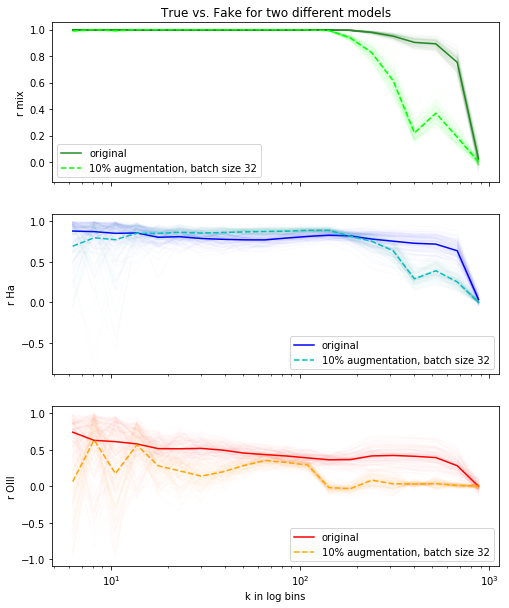

In [8]:
plot_two_models_r_vs_k(o_mix_list, o_ha_list, o_oiii_list, 
                       a_mix_list, a_ha_list, a_oiii_list, 
                       aug_output_dir, mod="10% augmentation, batch size 32",
                       title="Compare orig both augmented")

run42_index0
min 0.0
vmax: 7.824284864454967e-08


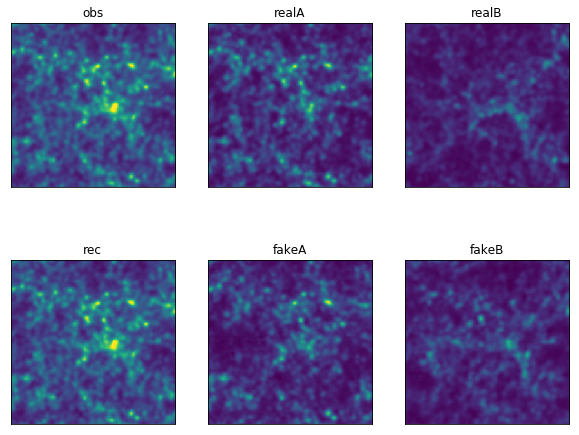

min -9.458334e-09
vmax: 9.016414281859397e-08


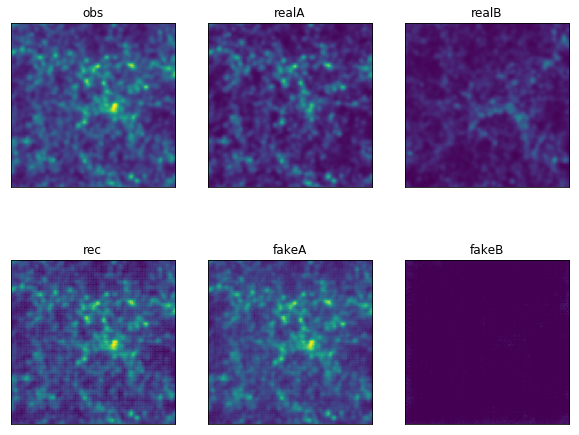

In [10]:
import random
suffix1 = random.sample(suffix_list, 1)[0]
print(suffix1)
ori_data = XAIDataLoader(ori_output_dir, exp_names[0], suffix1)
aug_data = XAIDataLoader(aug_output_dir, exp_names[0], suffix1)
plot_true_fake_maps(ori_data, ori_results_dir, exp_name='test', suffix=suffix1)
plot_true_fake_maps(aug_data, aug_results_dir, exp_name='test', suffix=suffix1)